In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize': (9, 6)})

In [32]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
X_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
          'MSSubClass', 'MSZoning', 'Neighborhood', 'HeatingQC', 'CentralAir', 'BsmtQual', 
          'BsmtCond', 'ExterQual', 'ExterCond', 'KitchenQual', 'GarageType', 'GarageFinish', 
          'SaleType', 'SaleCondition']
y_cols = ['SalePrice']
# X_train_df = df_train.loc[:,X_cols]
# y_train_df = df_train.loc[:,y_cols]
# X_test_df = df_test.loc[:,X_cols]

In [33]:
#drop the outliers
df_train = df_train.drop(1289)
df_train = df_train.drop(523)
n_train = df_train.shape[0]
n_train

1458

In [34]:
df = pd.concat([df_train, df_test], axis=0)

In [37]:
df = df[X_cols+y_cols]

In [38]:
df.isnull().sum()

OverallQual         0
GrLivArea           0
GarageCars          1
TotalBsmtSF         1
MSSubClass          0
MSZoning            4
Neighborhood        0
HeatingQC           0
CentralAir          0
BsmtQual           81
BsmtCond           82
ExterQual           0
ExterCond           0
KitchenQual         1
GarageType        157
GarageFinish      159
SaleType            1
SaleCondition       0
SalePrice        1459
dtype: int64

In [40]:
df.loc[df['BsmtQual'].isnull(), 'BsmtQual'] = 'NA'
df.loc[df['BsmtCond'].isnull(), 'BsmtCond'] = 'NA'
df.loc[df['GarageType'].isnull(), 'GarageType'] = 'NA'
df.loc[df['GarageFinish'].isnull(), 'GarageFinish'] = 'NA'
df.loc[df['GarageCars'].isnull(), 'GarageCars'] = df['GarageCars'].median()
df.loc[df['TotalBsmtSF'].isnull(), 'TotalBsmtSF'] = df['TotalBsmtSF'].median()
df.loc[df['MSZoning'].isnull(), 'MSZoning'] = df['MSZoning'].mode().values[0]
df.loc[df['SaleType'].isnull(), 'SaleType'] = df['SaleType'].mode().values[0]
df.loc[df['KitchenQual'].isnull(), 'KitchenQual'] = df['KitchenQual'].mode().values[0]

In [41]:
df.isnull().sum()

OverallQual         0
GrLivArea           0
GarageCars          0
TotalBsmtSF         0
MSSubClass          0
MSZoning            0
Neighborhood        0
HeatingQC           0
CentralAir          0
BsmtQual            0
BsmtCond            0
ExterQual           0
ExterCond           0
KitchenQual         0
GarageType          0
GarageFinish        0
SaleType            0
SaleCondition       0
SalePrice        1459
dtype: int64

In [42]:
df.shape

(2917, 19)

In [43]:
df.loc[:, 'MSSubClass'] = df['MSSubClass'].astype(str)

In [44]:
df['MSSubClass'].describe()

count     2917
unique      16
top         20
freq      1079
Name: MSSubClass, dtype: object

In [47]:
df_n = df.copy()
df_n.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'MSSubClass',
       'MSZoning', 'Neighborhood', 'HeatingQC', 'CentralAir', 'BsmtQual',
       'BsmtCond', 'ExterQual', 'ExterCond', 'KitchenQual', 'GarageType',
       'GarageFinish', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

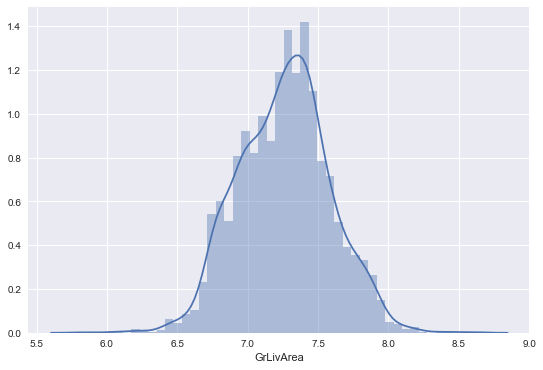

In [48]:
df_n.loc[:,'GrLivArea'] = np.log(df_n['GrLivArea'])
sns.distplot(df_n['GrLivArea'])

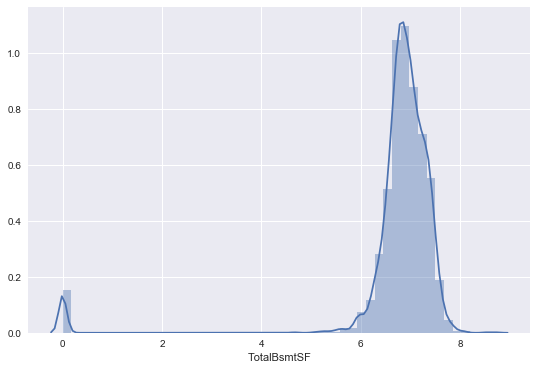

In [49]:
df_n.loc[:, 'TotalBsmtSF'] = np.log(df_n['TotalBsmtSF']+1)
sns.distplot(df_n['TotalBsmtSF'])

In [51]:
df_n.loc[:, 'GarageCars'] = df_n['GarageCars'].astype(str)
df_n['GarageCars'].describe()

count     2917
unique       6
top        2.0
freq      1595
Name: GarageCars, dtype: object

In [52]:
df_n['GarageCars'].head()

0    2.0
1    2.0
2    2.0
3    3.0
4    3.0
Name: GarageCars, dtype: object

In [53]:
df_n.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'MSSubClass',
       'MSZoning', 'Neighborhood', 'HeatingQC', 'CentralAir', 'BsmtQual',
       'BsmtCond', 'ExterQual', 'ExterCond', 'KitchenQual', 'GarageType',
       'GarageFinish', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [58]:
numerical_cols = []
for col in df_n.columns:
    if (df_n[col].dtype != object) & (col!='SalePrice'):
        numerical_cols.append(col)
        
print (numerical_cols)

['OverallQual', 'GrLivArea', 'TotalBsmtSF']


In [67]:
df_dummies = pd.get_dummies(df_n)

In [74]:
df_train = df_dummies.iloc[:n_train]
df_test = df_dummies.iloc[n_train:]

In [76]:
X_train = df_train.loc[:, df_train.columns != "SalePrice"].as_matrix()
y_train = df_train["SalePrice"].as_matrix()
X_test = df_test.loc[:, df_test.columns != 'SalePrice'].as_matrix()

In [77]:
y_train = np.log(y_train)
y_train

array([ 12.24769432,  12.10901093,  12.31716669, ...,  12.49312952,
        11.86446223,  11.90158345])

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 200, 300, 400, 500],
          'max_features': [0.2, 0.3, 0.4, 0.5]}

reg = GridSearchCV(RandomForestRegressor(), params, cv=10)
reg.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500], 'max_features': [0.2, 0.3, 0.4, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [79]:
y_pred = reg.predict(X_test)

In [80]:
y_pred

array([ 11.66185506,  11.94821174,  12.05617678, ...,  11.77795136,
        11.5965362 ,  12.27370331])

In [81]:
y_pred = np.exp(y_pred)

In [82]:
y_pred

array([ 116059.1278447 ,  154540.54115422,  172159.52130421, ...,
        130346.47263237,  108720.56057179,  213994.01156087])

In [83]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.loc[:,'SalePrice'] = pd.Series(y_pred)
sample_submission.to_csv('RF1.csv', index=False)

In [84]:
reg.best_params_

{'max_features': 0.3, 'n_estimators': 300}

In [85]:
reg_full = RandomForestRegressor(max_features=0.3, n_estimators=300)
reg_full.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [86]:
y_pred = np.exp(reg_full.predict(X_test))

In [87]:
y_pred

array([ 115581.91505009,  153934.92101049,  170605.78911261, ...,
        132115.68753632,  109573.22710703,  208972.99379478])

In [88]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.loc[:,'SalePrice'] = pd.Series(y_pred)
sample_submission.to_csv('RF1.csv', index=False)

In [90]:
params = {'n_estimators': [300],
          'max_features': [0.3],
          'min_samples_split': [3, 5, 10, 15, 20]}

reg = GridSearchCV(RandomForestRegressor(), params, cv=10, scoring='neg_mean_squared_error')
reg.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [300], 'max_features': [0.3], 'min_samples_split': [3, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [91]:
reg.best_params_

{'max_features': 0.3, 'min_samples_split': 5, 'n_estimators': 300}

In [93]:
y_pred = np.exp(reg.predict(X_test))

In [94]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.loc[:,'SalePrice'] = pd.Series(y_pred)
sample_submission.to_csv('RF1.csv', index=False)

# Gradient Boosting

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': [100, 200, 300],
          'max_features': [0.3, 0.5, 1.0],
          'learning_rate': [0.001, 0.01, 0.1],
          'max_depth': [1,2,3]}

reg = GridSearchCV(GradientBoostingRegressor(), params, cv=10, scoring='neg_mean_squared_error')
reg.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300], 'max_features': [0.3, 0.5, 1.0], 'learning_rate': [0.001, 0.01, 0.1], 'max_depth': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [99]:
y_pred = np.exp(reg.predict(X_test))
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.loc[:,'SalePrice'] = pd.Series(y_pred)
sample_submission.to_csv('GradientBoosting.csv', index=False)

In [101]:
reg.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'max_features': 0.3,
 'n_estimators': 300}